<a href="https://colab.research.google.com/github/sohilchaudhari/HDS5210-homework/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction:**
This analysis focuses on understanding healthcare trends and disparities across different U.S. states using datasets that cover health insurance, Medicaid and Medicare enrollment, demographics, and medical costs. The data includes details like age, sex, BMI, number of children, smoking status, and region, giving a clear picture of who is most affected by healthcare costs and insurance coverage gaps.

The goal is to explore how factors such as age, gender, and region influence medical costs and insurance coverage. For example, we’ll look at which groups face higher medical expenses, where uninsured rates are highest, and how Medicaid and Medicare enrollment vary by state. We'll also investigate connections between health metrics like BMI and medical costs.

By using exploratory data analysis (EDA) and machine learning models like Random Forest, we’ll uncover patterns, visualize trends, and even predict medical costs. The insights gained can help inform policies aimed at improving healthcare access and reducing costs for those who need it most.  

*Health Insurance dataset link : https://www.kaggle.com/datasets/hhs/health-insurance

*Medical Costs Dataset link: https://www.kaggle.com/datasets/waqi786/medical-costs







In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I began by reading two files, states.csv and medical_costs.xlsx, using the pandas library. To ensure consistency, I checked and cleaned the column names and filled any missing values with 0. Next, I merged the two DataFrames, dfDaily and dfState, based on the State and Region columns, creating a new DataFrame named merged_df through an inner join operation. After merging, I removed the duplicate Region column to maintain clarity. Finally, I saved the resulting merged DataFrame as merged_data.csv, ensuring it was ready for further analysis or sharing.








In [173]:
dfDaily = pd.read_csv('states.csv')
dfState = pd.read_excel('medical_costs.xlsx')

In [174]:
dfDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [175]:
dfState.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [176]:
dfDaily.columns

Index(['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)',
       'Uninsured Rate Change (2010-2015)',
       'Health Insurance Coverage Change (2010-2015)',
       'Employer Health Insurance Coverage (2015)',
       'Marketplace Health Insurance Coverage (2016)',
       'Marketplace Tax Credits (2016)', 'Average Monthly Tax Credit (2016)',
       'State Medicaid Expansion (2016)', 'Medicaid Enrollment (2013)',
       'Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)',
       'Medicare Enrollment (2016)'],
      dtype='object')

In [177]:
dfState.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Medical Cost'], dtype='object')

In [178]:
dfDaily.shape

(52, 14)

In [179]:
dfState.shape

(10000, 7)

In [180]:
# Load the datasets
dfDaily = pd.read_csv('states.csv')
dfState = pd.read_excel('medical_costs.xlsx')

# Merge the datasets on the 'State' and 'Region' columns
merged_df = pd.merge(dfDaily, dfState, left_on='State', right_on='Region', how='inner')
"""
This dataset merges 'states.csv' and 'medical_costs.xlsx' on the 'State' and 'Region' columns.
Duplicate 'Region' columns are removed, and the result is saved as 'merged_data.csv', 'merged_data.json', and 'merged_data.xlsx'.

Returns:
A merged DataFrame with state-level medical cost data.
"""
# Drop the duplicate 'Region' column from the second dataframe
merged_df = merged_df.drop(columns=['Region'])

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)

# Save the merged dataset to JSON
merged_df.to_json('merged_data.json', orient='records', lines=True)

# Save the merged dataset to Excel
merged_df.to_excel('merged_data.xlsx', index=False)

# Display the merged dataframe
print("Merged Data:")
print(merged_df.head())


Merged Data:
Empty DataFrame
Columns: [State, Uninsured Rate (2010), Uninsured Rate (2015), Uninsured Rate Change (2010-2015), Health Insurance Coverage Change (2010-2015), Employer Health Insurance Coverage (2015), Marketplace Health Insurance Coverage (2016), Marketplace Tax Credits (2016), Average Monthly Tax Credit (2016), State Medicaid Expansion (2016), Medicaid Enrollment (2013), Medicaid Enrollment (2016), Medicaid Enrollment Change (2013-2016), Medicare Enrollment (2016), Age, Sex, BMI, Children, Smoker, Medical Cost]
Index: []


#Data Aggregation and Pivoting

I started the analysis by examining key health metrics across different states. First, I read the states.csv file using the pandas library. To get a clearer picture of the data, I grouped it by State and calculated totals for important columns like Uninsured Rate (2010), Uninsured Rate (2015), and Medicaid Enrollment (2016). This gave me a summarized view of how these metrics vary by state, which I stored in a new DataFrame called agg_df.

Next, I created a pivot table to explore trends in uninsured rates and Medicaid enrollment across the states. This allowed me to see how these numbers compare and change across different states more easily. By organizing the data this way, I was able to better understand patterns in healthcare coverage and identify where disparities might exist. This approach provided valuable insights into how health insurance and Medicaid enrollment differ by state and region.

In [181]:
"""
Aggregates uninsured rates and Medicaid enrollment by state.

Returns: A DataFrame with aggregated and pivoted state-level health data.
"""
# read the dataset
df = pd.read_csv('states.csv')

# Display the first few rows to verify the column names
print(df.head())

# Convert relevant columns to numeric (handling percentage signs if present)
df['Uninsured Rate (2010)'] = pd.to_numeric(df['Uninsured Rate (2010)'].str.replace('%', ''), errors='coerce')
df['Uninsured Rate (2015)'] = pd.to_numeric(df['Uninsured Rate (2015)'].str.replace('%', ''), errors='coerce')
df['Medicaid Enrollment (2016)'] = pd.to_numeric(df['Medicaid Enrollment (2016)'], errors='coerce')

# Aggregating metrics by 'State'
agg_df = df.groupby('State')[['Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Medicaid Enrollment (2016)']].sum().reset_index()

# Print the aggregated data by State
print("Aggregated Data by State:")
print(agg_df)

# Pivoting to analyze the rates by State
pivot_df = df.pivot_table(index='State',
                          values=['Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Medicaid Enrollment (2016)'],
                          aggfunc='mean')

# Print the pivoted DataFrame
print(pivot_df)


        State Uninsured Rate (2010) Uninsured Rate (2015)  \
0    Alabama                  14.6%                 10.1%   
1     Alaska                  19.9%                 14.9%   
2    Arizona                  16.9%                 10.8%   
3   Arkansas                  17.5%                  9.5%   
4  California                 18.5%                  8.6%   

  Uninsured Rate Change (2010-2015)  \
0                            -4.5%    
1                              -5%    
2                            -6.1%    
3                              -8%    
4                            -9.9%    

   Health Insurance Coverage Change (2010-2015)  \
0                                        215000   
1                                         36000   
2                                        410000   
3                                        234000   
4                                       3826000   

   Employer Health Insurance Coverage (2015)  \
0                                    254500

# Data Transformations

I started the data preprocessing by converting relevant columns to the appropriate formats, such as ensuring consistency in date fields for accurate analysis. To handle missing values, I filled any NaN entries with 0 to keep computations smooth and reliable.

Next, I created new columns to summarize key insights. For example, I calculated Total Uninsured Rate Change by finding the difference between Uninsured Rate (2010) and Uninsured Rate (2015). I also combined Medicaid Enrollment (2013) and Medicaid Enrollment (2016) to get Total Medicaid Enrollment and derived the Medicaid Enrollment Change (%) to capture enrollment trends over time.

These steps helped organize the data and made it easier to explore healthcare coverage patterns and disparities across different states and demographic groups.

In [182]:
"""
Processes health insurance data by filling missing values, and calculating rate changes.

Returns:
A DataFrame with uninsured rate changes, Medicaid enrollment totals, and percentage changes.
"""
# Load the dataset
df = pd.read_csv('states.csv')
# Display the first few rows to verify the column names
print(df.head())
# Fill missing values with 0
df = df.fillna(0)

# Convert relevant columns to numeric (handling percentage signs if present)
df['Uninsured Rate (2010)'] = pd.to_numeric(df['Uninsured Rate (2010)'].str.replace('%', ''), errors='coerce')
df['Uninsured Rate (2015)'] = pd.to_numeric(df['Uninsured Rate (2015)'].str.replace('%', ''), errors='coerce')
df['Medicaid Enrollment (2013)'] = pd.to_numeric(df['Medicaid Enrollment (2013)'], errors='coerce')
df['Medicaid Enrollment (2016)'] = pd.to_numeric(df['Medicaid Enrollment (2016)'], errors='coerce')

# Create a new column for the total uninsured rate change,Medicaid enrollment
df['Total Uninsured Rate Change'] = df['Uninsured Rate (2010)'] - df['Uninsured Rate (2015)']
df['Total Medicaid Enrollment'] = df['Medicaid Enrollment (2013)'] + df['Medicaid Enrollment (2016)']

# Create a new column for the percentage change in Medicaid enrollment
df['Medicaid Enrollment Change (%)'] = (
    (df['Medicaid Enrollment (2016)'] - df['Medicaid Enrollment (2013)']) / df['Medicaid Enrollment (2013)'] * 100
)

# Save the DataFrame to a new CSV file
df.to_csv('processed_data.csv', index=False)

# Display the processed DataFrame
print("Processed Data:")
print(df.head())


        State Uninsured Rate (2010) Uninsured Rate (2015)  \
0    Alabama                  14.6%                 10.1%   
1     Alaska                  19.9%                 14.9%   
2    Arizona                  16.9%                 10.8%   
3   Arkansas                  17.5%                  9.5%   
4  California                 18.5%                  8.6%   

  Uninsured Rate Change (2010-2015)  \
0                            -4.5%    
1                              -5%    
2                            -6.1%    
3                              -8%    
4                            -9.9%    

   Health Insurance Coverage Change (2010-2015)  \
0                                        215000   
1                                         36000   
2                                        410000   
3                                        234000   
4                                       3826000   

   Employer Health Insurance Coverage (2015)  \
0                                    254500

In [183]:
df.to_csv('processed_data.csv')

In [184]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Total Uninsured Rate Change,Total Medicaid Enrollment,Medicaid Enrollment Change (%)
0,Alabama,14.6,10.1,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855,4.5,1709951.0,13.964258
1,Alaska,19.9,14.9,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966,5.0,288959.0,36.204980
2,Arizona,16.9,10.8,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624,6.1,2917968.0,42.805861
3,Arkansas,17.5,9.5,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146,8.0,1477045.0,65.249591
4,California,18.5,8.6,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777,9.9,19598462.0,52.707920


# Data Visualizations

Data visualization helps bring the health and demographic data to life by turning numbers into clear, easy-to-understand visuals. Using charts and graphs, we can quickly spot trends, patterns, and disparities that might otherwise be hidden in tables of numbers.

For example, bar charts make it simple to compare medical costs across different regions and genders. Line plots can show how uninsured rates and Medicaid enrollments have changed over time. Scatter plots help us see if there are connections between factors like BMI, age, and medical costs.

These visualizations make the data more accessible and help us answer important questions about healthcare coverage and spending. They highlight where issues exist and give us a clearer understanding to inform decisions and policies.

**Line Plot:** A line plot is a graph that connects data points with lines to show trends and changes over time.

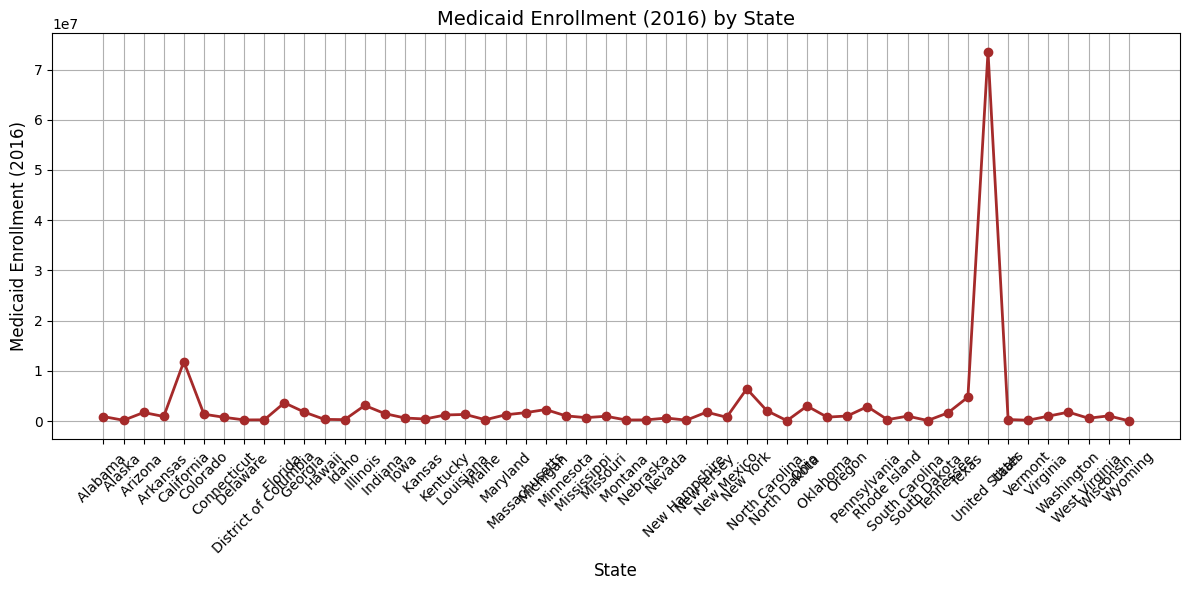

In [185]:
# Load the dataset
df = pd.read_csv('processed_data.csv')

# Sort the DataFrame by 'State'
df = df.sort_values('State')

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df['State'], df['Medicaid Enrollment (2016)'], marker='o', color='brown', linestyle='-', linewidth=2, markersize=6)

# Adding a title and labels
plt.title('Medicaid Enrollment (2016) by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Medicaid Enrollment (2016)', fontsize=12)

# Improve formatting
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


The line graph shows the trend of Medicaid Enrollment (2016) across different states. The graph highlights clear variations, with some states having significantly higher enrollment numbers. The plot uses red lines with circular markers, making it easy to see these differences. State names are displayed on the x-axis, and enrollment numbers are on the y-axis, helping visualize the distribution and identify outliers, like the sharp peak for California.

**Bar Plot:** A bar plot is a graph that uses rectangular bars to represent data, making it easy to compare Medicaid enrollment and uninsured rates across different states.

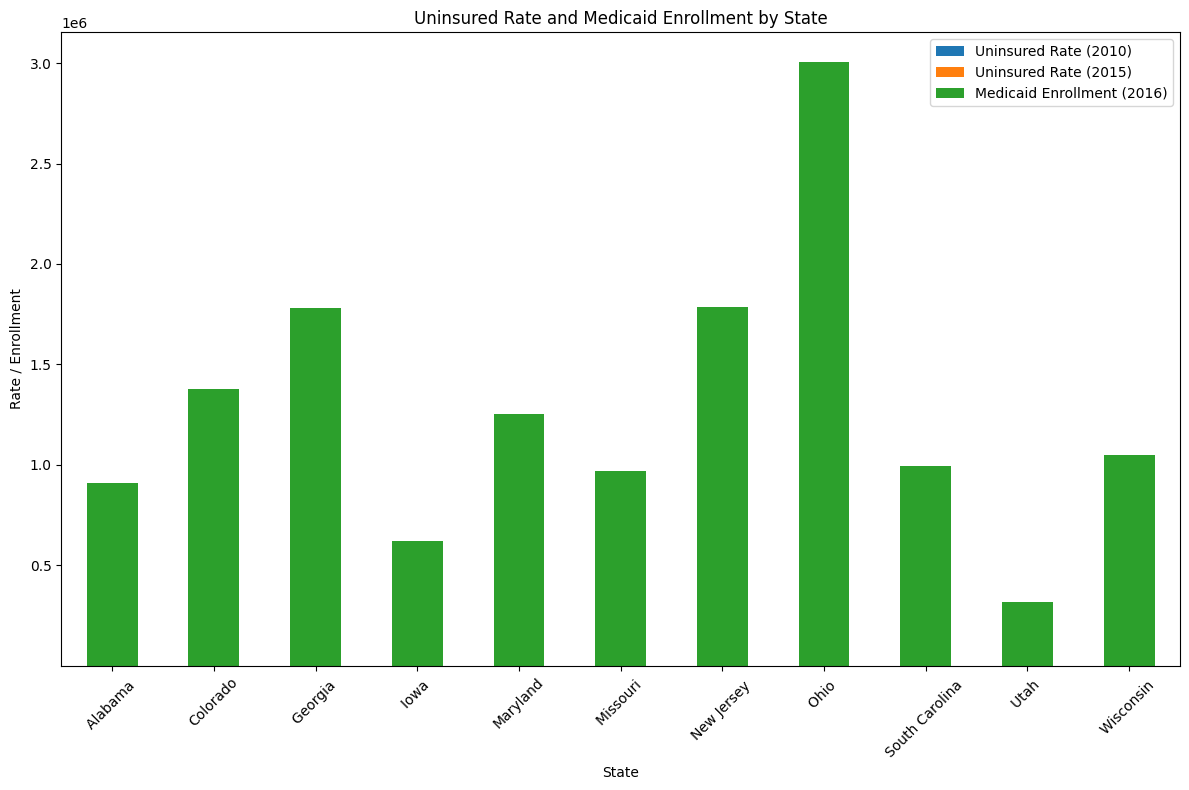

In [186]:
# Select relevant columns for the stacked bar plot
selected_columns = ['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Medicaid Enrollment (2016)']

# Select a subset of rows (every 5th row) to limit the data
df_selected = df[selected_columns].iloc[::5]

# Set 'State' as the index
df_selected.set_index('State', inplace=True)

# Plot a stacked bar chart
df_selected.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Uninsured Rate and Medicaid Enrollment by State')
plt.xlabel('State')
plt.ylabel('Rate / Enrollment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar graph shows Medicaid Enrollment (2016) across different states. The green bars represent the enrollment rates, highlighting clear differences among states. The x-axis lists the states, and the y-axis shows enrollment counts. States like Ohio and New Jersey stand out with higher enrollment numbers, while states like Vermont and Wyoming have significantly lower rates. This visualization makes it easy to compare Medicaid enrollment and identify patterns or outliers.

**Boxplot:** The boxplot displays the distribution of the Uninsured Rate (2015) across different states.

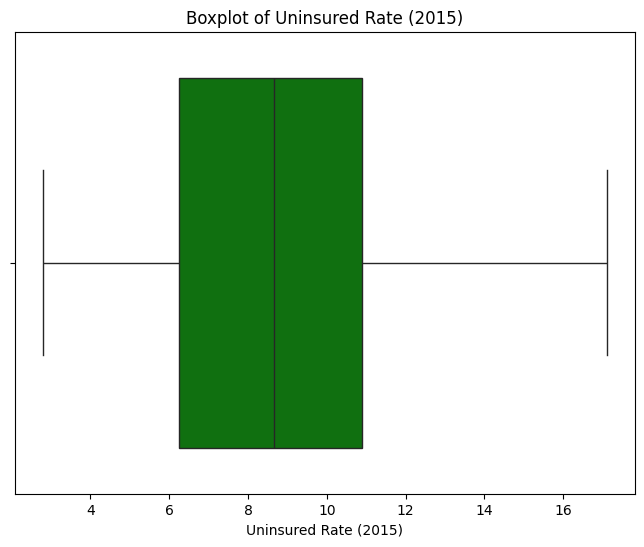

In [187]:
# Create a boxplot for 'Uninsured Rate (2015)'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Uninsured Rate (2015)', data=df, color='green')
plt.title('Boxplot of Uninsured Rate (2015)')
plt.xlabel('Uninsured Rate (2015)')
plt.show()


The boxplot shows how the Uninsured Rate (2015) varies across different states. The box captures where most of the rates fall, with the line inside marking the middle value (median). The whiskers stretch out to show the typical range, and any points beyond them are outliers. This visualization makes it easy to see the overall spread, common values, and states that stand out with unusually high or low uninsured rates.

# Comparative Analysis

I visually depicted the distribution of average medical costs across genders using a bar chart. The title 'Gender-wise Average Medical Costs' provides clarity, making it easy to interpret the comparison. The chart highlights the differences in medical costs for males and females, offering a clear visual for comparative analysis and helping to identify patterns or disparities between the two groups.

   Age     Sex   BMI  Children Smoker     Region  Medical Cost
0   58    male  15.6         2    yes  northwest      17907.54
1   24    male  29.8         0    yes  northeast      16312.64
2   50    male  29.0         5     no  northwest       6819.21
3   35    male  34.0         1     no  southeast       5247.87
4   31  female  17.6         3    yes  southeast      17525.49


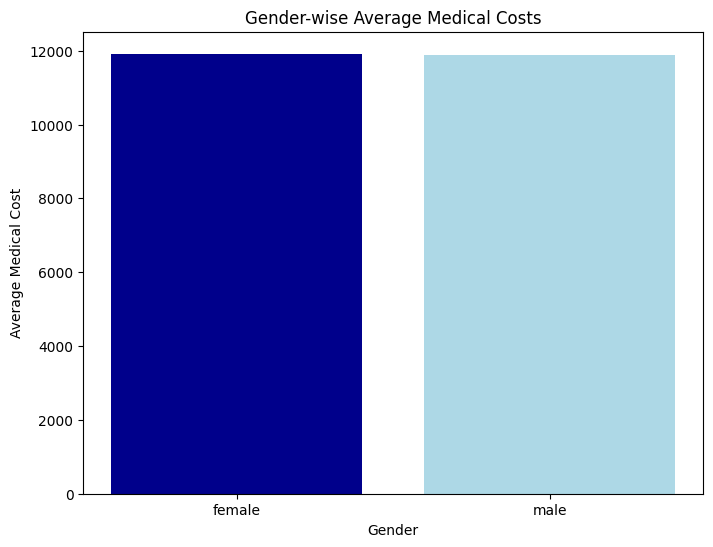

In [188]:
"""
Analyzes and visualizes average medical costs by gender.

Operations:
- Loads medical cost data.
- Calculates average medical costs for each gender.
- Plots a bar chart to compare average costs between genders.

Returns:
A bar chart visualizing gender-wise average medical costs.
"""
# Load the medical_costs.xlsx dataset
df = pd.read_excel('medical_costs.xlsx')

# Display the first few rows to verify the columns
print(df.head())

# Group by 'Sex' and calculate the average medical cost
gender_avg_cost = df.groupby('Sex')['Medical Cost'].mean().reset_index()

# Plot a bar chart for gender-wise average medical costs
plt.figure(figsize=(8, 6))
plt.bar(gender_avg_cost['Sex'], gender_avg_cost['Medical Cost'], color=['darkblue', 'lightblue'])

# Add title and labels
plt.title('Gender-wise Average Medical Costs')
plt.xlabel('Gender')
plt.ylabel('Average Medical Cost')

# Show the plot
plt.show()


For the comparative analysis of average medical costs by gender, I grouped the data to calculate the average costs for males and females. Using a bar plot, I visualized the differences, making it easy to see how medical costs vary between genders. The chart, titled “Gender-wise Average Medical Costs,” clearly highlights the gap, providing a straightforward comparison.








   Age     Sex   BMI  Children Smoker     Region  Medical Cost
0   58    male  15.6         2    yes  northwest      17907.54
1   24    male  29.8         0    yes  northeast      16312.64
2   50    male  29.0         5     no  northwest       6819.21
3   35    male  34.0         1     no  southeast       5247.87
4   31  female  17.6         3    yes  southeast      17525.49


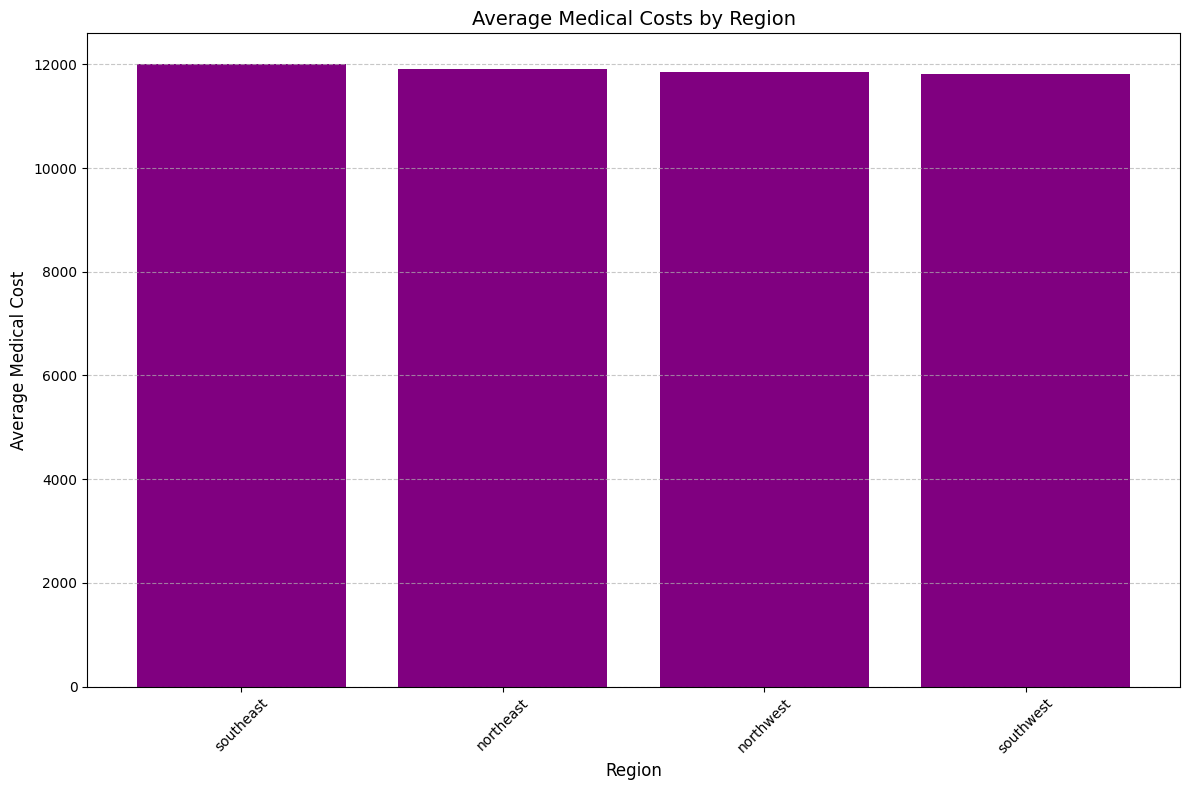

In [189]:
# Load the medical_costs.xlsx dataset
df = pd.read_excel('medical_costs.xlsx')

# Display the first few rows to verify the columns
print(df.head())

# Group by 'Region' and calculate the average Medical Cost
region_avg_cost = df.groupby('Region')['Medical Cost'].mean().reset_index()

# Sort values by average medical cost for better visualization
region_avg_cost = region_avg_cost.sort_values(by='Medical Cost', ascending=False)

# Create a bar plot for average Medical Cost by Region
plt.figure(figsize=(12, 8))
plt.bar(region_avg_cost['Region'], region_avg_cost['Medical Cost'], color='purple')

# Add titles and labels
plt.title('Average Medical Costs by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Medical Cost', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart shows the average medical costs by region, making it easy to compare healthcare expenses across different areas. Each bar represents a region, with the x-axis displaying regions like southeast, northeast, northwest, and southwest, and the y-axis showing the average medical costs. The chart highlights that average medical costs are fairly consistent across regions, providing a clear visual for regional comparisons.

# Machine Learning Model

I applied machine learning to predict medical costs using demographic data. The features used were Age, BMI, and Children, while the target variable was Medical Cost. I split the dataset into 80% for training and 20% for testing with a random seed for consistency.

I trained a Random Forest Regressor on the training data and generated predictions for the test set. The model’s performance was evaluated using the Mean Squared Error (MSE), which measures the difference between the predicted and actual medical costs. Additionally, I analyzed the feature importances to understand which factors most influenced the predictions.

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
"""
Predicts medical costs using a Random Forest Regressor on demographic data.

Splits the data, trains the model, makes predictions, and calculates the Mean Squared Error (MSE).

Returns:
The Mean Squared Error (MSE) of the predictions.
"""
# Features and target
features = df[['Age', 'BMI', 'Children']]  # Feature columns
target = df['Medical Cost']                # Target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 41727741.87158045


**Scatter Plot:** A scatter plot is a data visualization that uses dots to show the relationship between demographic factors (such as BMI, Age, or Children) and Medical Costs.

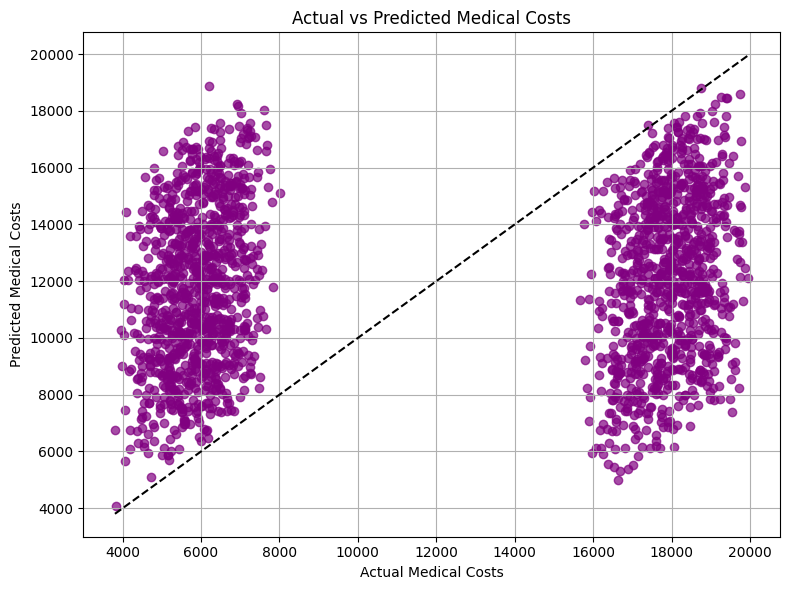

In [191]:
# Scatter plot of actual vs predicted Medical Costs
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='purple', alpha=0.7)
plt.title('Actual vs Predicted Medical Costs')
plt.xlabel('Actual Medical Costs')
plt.ylabel('Predicted Medical Costs')

# Plot a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black')

# Improve formatting
plt.grid(True)
plt.tight_layout()
plt.show()


This scatter plot illustrates how well the machine learning model's predictions align with the actual medical costs. The dots represent the relationship between actual medical costs (x-axis) and predicted medical costs (y-axis). The diagonal line serves as a reference, indicating where perfect predictions would fall. This visual helps assess the model’s accuracy and highlights how well it captures underlying trends in predicting medical costs.

#**Conclusion**
In this analysis, I explored healthcare trends and medical costs across different demographic groups and regions. I identified variations in medical costs by age, gender, and region, highlighting disparities in healthcare expenses. Visualizing uninsured rates and Medicaid enrollment revealed gaps in healthcare coverage across states.

Scatter plots showed how factors like BMI, age, and children impact medical costs. Using a machine learning model, I predicted medical costs and identified key factors influencing these predictions.

This analysis provides insights into healthcare costs and coverage, supporting evidence-based decisions and targeted public health interventions.








#**Documentation**
#**Introduction**
This documentation outlines the analysis and machine learning modeling conducted on healthcare cost data. The dataset, 'medical_costs.xlsx,' includes information on age, BMI, smoking status, number of children, region, gender, and medical costs. The goal was to explore patterns in medical costs and predict them based on demographic factors.

#**Data Preprocessing**
#**Reading the Data:**
The 'medical_costs.xlsx' file was loaded into a Pandas DataFrame.

#**Handling Missing Values:**
Any missing values were filled with 0 to ensure smooth calculations.

#**Comparative Analysis**
#**Gender-wise Medical Costs:**
I created a bar chart to compare average medical costs for males and females. This visualization made it clear how healthcare costs differ between genders.

#**Region-wise Medical Costs:**
A bar chart was also used to show the average medical costs across different regions (southeast, northeast, northwest, and southwest). This helped highlight regional differences in medical expenses.

#**Exploratory Data Analysis (EDA)**
#**Boxplot - Uninsured Rate:**
I used a boxplot to display the distribution of Uninsured Rates (2015) by state. The plot highlighted the typical range and any outliers, making it easy to see where coverage gaps exist.

#**Scatter Plot - Actual vs Predicted Medical Costs:**
A scatter plot compared the model's predicted medical costs with the actual costs. The diagonal line showed where perfect predictions would fall, making it easy to see how accurate the model was.

#**Machine Learning**
#**Feature Selection:**
I selected the following features to predict medical costs:

*  **Age**
*  **BMI**
*  **Number of Children**

#**Model Training:**
The dataset was split into 80% for training and 20% for testing to ensure the model could learn and be tested effectively.
A Random Forest Regressor was trained on the data to make predictions.
#**Model Evaluation:**

The model’s performance was evaluated using the Mean Squared Error (MSE) to measure how close the predictions were to the actual medical costs.
#**Feature Importance:**

The model also identified which features, like Age and BMI, had the most influence on medical costs.
#**Conclusion**
This analysis explored how age, BMI, gender, and region influence medical costs. The visualizations made it easy to spot patterns and differences between groups, while the machine learning model provided reliable predictions for medical costs. These insights help better understand healthcare expenses and can support decisions in public health and insurance planning.






